In [228]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [229]:
#1(a)

# Use Pandas to do the following:

# • 1. Read in the file ”GlobalLandTemperaturesByState.csv”.
# • 2. Filter the table to include only the columns for the date, temperature, and state.
# • 3. Filter the table to include only years after 2000.
# • 4. Filter the table to include only the rows corresponding to Wyoming, Nebraska, or South Dakota. 
# Check: your table should be 495 rows and 3 columns

GlobalTemp_df = pd.read_csv("GlobalLandTemperaturesByState.csv")
GlobalTemp_df

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil
...,...,...,...,...,...
645670,2013-05-01,21.634,0.578,Zhejiang,China
645671,2013-06-01,24.679,0.596,Zhejiang,China
645672,2013-07-01,29.272,1.340,Zhejiang,China
645673,2013-08-01,29.202,0.869,Zhejiang,China


In [230]:
# • 2. Filter the table to include only the columns for the date, temperature, and state.

new_df = GlobalTemp_df[['dt', 'AverageTemperature', 'State']].copy()
new_df

,dt,AverageTemperature,State
0,1855-05-01,25.544,Acre
1,1855-06-01,24.228,Acre
2,1855-07-01,24.371,Acre
3,1855-08-01,25.427,Acre
4,1855-09-01,25.675,Acre
...,...,...,...
645670,2013-05-01,21.634,Zhejiang
645671,2013-06-01,24.679,Zhejiang
645672,2013-07-01,29.272,Zhejiang
645673,2013-08-01,29.202,Zhejiang


In [232]:
# .value_counts() Returns a Series containing counts of unique values.

# year_counts = new_df[['dt']].groupby('dt').value_counts()
# year_counts

# # Filter for the year 2001 (to see how many rows contain 2001 or any other desired year)
# year_counts = new_df[new_df['dt'].dt.year == 2001]
# year_counts

In [235]:
# • 3. Filter the table to include only years after 2000.

# GlobalTemp_df[['dt']]

years_after_2000_df = new_df[new_df['dt'] > '2000']  #To filter dates in Pandas when they are stored as strings
years_after_2000_df

# Below is filtering original dataframe
# years_after_2000_df = GlobalTemp_df[GlobalTemp_df['dt'] > '2000']  #To filter dates in Pandas when they are stored as strings
# years_after_2000_df

,dt,AverageTemperature,State
1736,2000-01-01,25.934,Acre
1737,2000-02-01,26.102,Acre
1738,2000-03-01,26.107,Acre
1739,2000-04-01,25.952,Acre
1740,2000-05-01,25.832,Acre
...,...,...,...
645670,2013-05-01,21.634,Zhejiang
645671,2013-06-01,24.679,Zhejiang
645672,2013-07-01,29.272,Zhejiang
645673,2013-08-01,29.202,Zhejiang


In [236]:
# • 4. Filter the table to include only the rows corresponding to Wyoming, Nebraska, or South Dakota. 

# Using .isin() to filter rows in dataframe to include only rows corresponding to specific value (states).
# (Check: your table should be 495 rows and 3 columns) 

states = ['Wyoming','Nebraska','South Dakota']
state_counts = years_after_2000_df[years_after_2000_df['State'].isin(states)]
state_counts

,dt,AverageTemperature,State
350761,2000-01-01,-2.024,Nebraska
350762,2000-02-01,1.719,Nebraska
350763,2000-03-01,5.687,Nebraska
350764,2000-04-01,9.417,Nebraska
350765,2000-05-01,16.827,Nebraska
...,...,...,...
626435,2013-05-01,10.607,Wyoming
626436,2013-06-01,16.267,Wyoming
626437,2013-07-01,20.222,Wyoming
626438,2013-08-01,19.621,Wyoming


In [237]:
# (1b) Modify the table such that it contains the average temperature over all
# three states for each date. It should have two columns: date and average tem-
# perature.
    
# • 1. Look into the function ”groupby”.
# https://www.geeksforgeeks.org/python-pandas-dataframe-groupby/

avg_temp_states = state_counts.groupby('dt', as_index=False)['AverageTemperature'].mean()
avg_temp_states

,dt,AverageTemperature
0,2000-01-01,-4.072000
1,2000-02-01,-0.205000
2,2000-03-01,3.642667
3,2000-04-01,7.609667
4,2000-05-01,14.255000
...,...,...
160,2013-05-01,13.196000
161,2013-06-01,18.783667
162,2013-07-01,22.110333
163,2013-08-01,21.890000


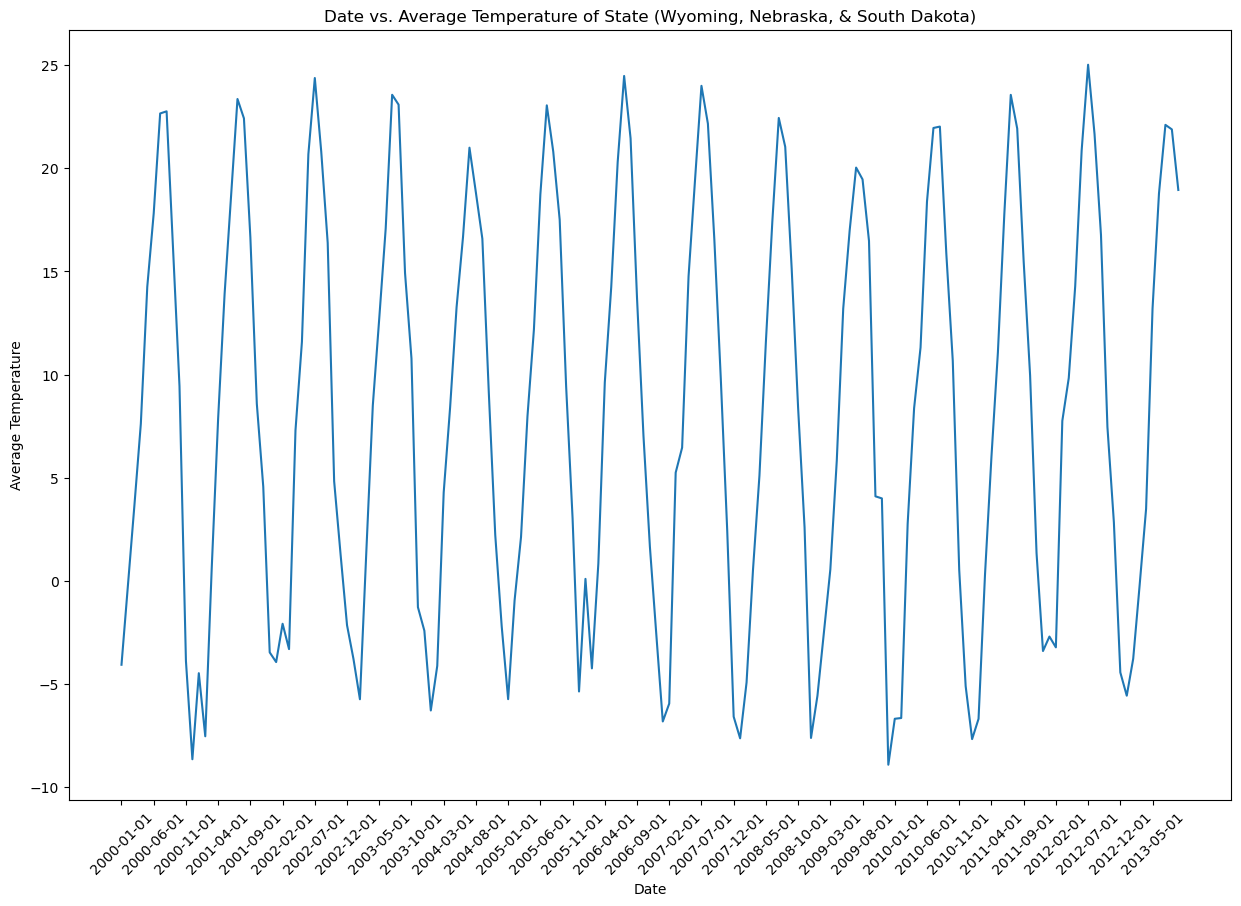

In [238]:
# (1c) Use matplotlib.pyplot to plot the data from the table you created above.You
# can pass pandas columns directly into matplotlib without needing to turn them
# into arrays

plt.figure(figsize=(15,10))
plt.title("Date vs. Average Temperature of State (Wyoming, Nebraska, & South Dakota)")
plt.xlabel("Date")
plt.ylabel("Average Temperature")
plt.plot(avg_temp_states['dt'], avg_temp_states['AverageTemperature'])

# Rotate and reduce ticks
plt.xticks(avg_temp_states['dt'][::5], rotation = 45) 

plt.show()

In [240]:
from datetime import datetime

# (1d) scipy.optimize, unsurprisingly, can only do math with numbers. The date
# column of the table is currently composed of strings.

# • 1. Fix this and convert the string date into numerical values however you
# see fit, and make it a column in the dataframe. Your numerical values
# should capture all parts of the date provided in the string (don’t use just
# the year, etc).

# To convert a string date into numerical values suitable for use with SciPy
# datetime objects 
avg_temp_states['dt'] = pd.to_datetime(avg_temp_states['dt'])

# Convert datetime objects to numerical values
avg_temp_states['NumericalDate'] = pd.to_numeric(avg_temp_states['dt'])
avg_temp_states
avg_temp_states['NumericalDate'] = avg_temp_states['dt'].apply(lambda x: x.timestamp())
avg_temp_states

,dt,AverageTemperature,NumericalDate
0,2000-01-01,-4.072000,9.466848e+08
1,2000-02-01,-0.205000,9.493632e+08
2,2000-03-01,3.642667,9.518688e+08
3,2000-04-01,7.609667,9.545472e+08
4,2000-05-01,14.255000,9.571392e+08
...,...,...,...
160,2013-05-01,13.196000,1.367366e+09
161,2013-06-01,18.783667,1.370045e+09
162,2013-07-01,22.110333,1.372637e+09
163,2013-08-01,21.890000,1.375315e+09


In [241]:
max = np.max(avg_temp_states['AverageTemperature'])
min = np.min(avg_temp_states['AverageTemperature'])
average_amplitude = (max + min)/2
average_amplitude

8.0535

In [242]:
mean_temperature = np.mean(avg_temp_states['AverageTemperature'])
mean_temperature

8.228769696969698

In [ ]:
# pattern (period) repeats about every 5 years ~ (2000 to 2005)

In [243]:
# (1e)scipy.optimize requires: a model equation, and an initial guess of parame-
# ters. For this section:

# • 1. Define an appropriate model equation. Use a generic form like mx+b:
# there should be four parameters.

def model_equation(x, a, b, c, d):
       return a * np.cos(2 * np.pi * (x - d) / c) + b

# Define:
# a: Amplitude 
# b: Vertical shift 
# c: Period 
# d: Phase shift 

In [244]:
# • 2. Make an initial guess at the parameters and save them in an array.
# • This part is really important. A dataset with a non polynomial pattern
# was chosen for a reason: your initial guesses matter, particularly the period.

# • If you’re stuck, eyeball the length of the period (it should make physical
# sense, and remember that the units are in years) and keep this in mind:
# cos(2x) means the function covers two periods in the space of 2pi. 2 *
# period = 2pi, so each period is pi long.


# Initial guess for the parameters [A, B, C, D]
# initial_guess = [8.0535, 8.2288, 5, 0] 

C:\Users\olivi\AppData\Local\Temp\ipykernel_15692\3158171812.py:33: OptimizeWarning: Covariance of the parameters could not be estimated
  params, covariance = curve_fit(model_equation, x_data, y_data, p0=initial_guess)


Fitted parameters: A=-25.898134915226024, B=33.31435993486032, C=1.9999999999689924, D=0.0


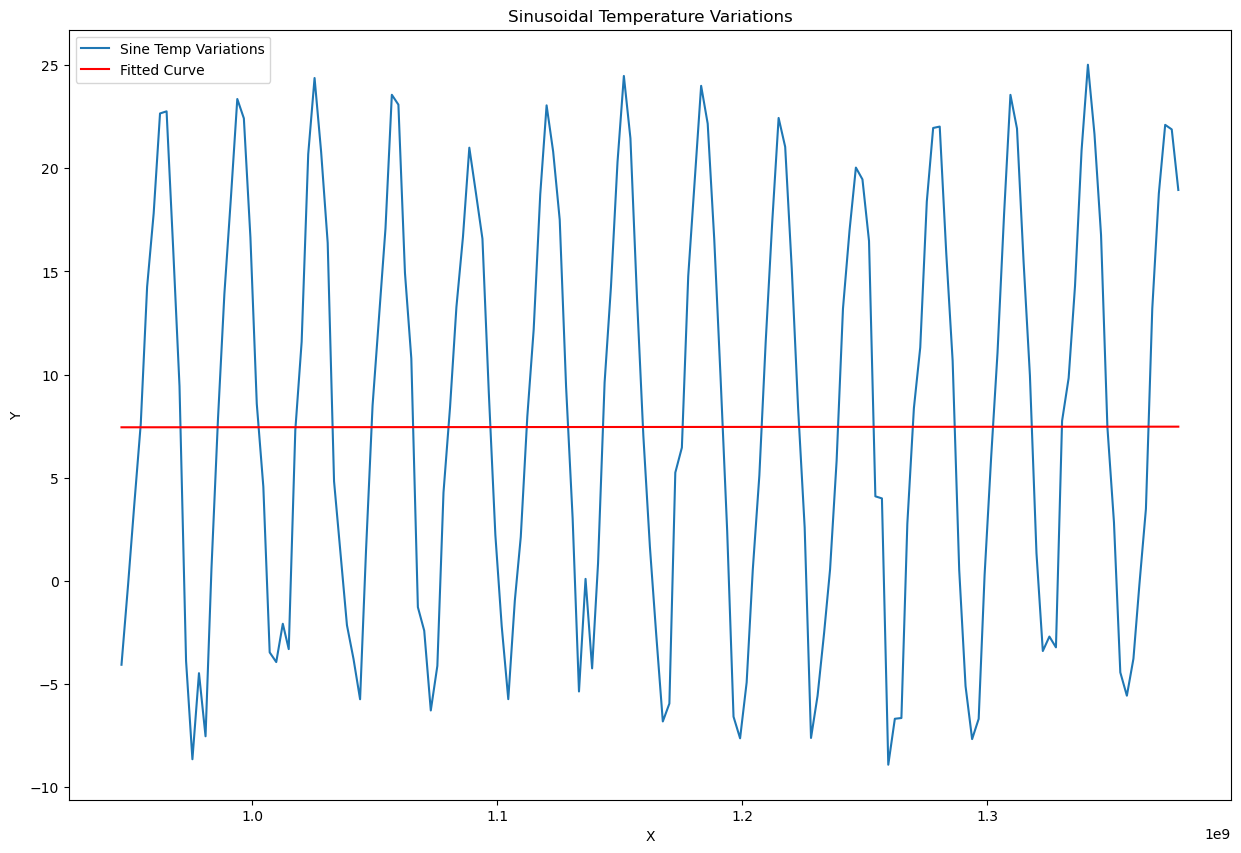

In [258]:
# 1f ) Run scipy.optimize’s curve fit function! Remember that it outputs a tuple
# containing two arrays: the parameter array and the covariance matrix.
# • If while attempting this, you get one of the following errors:
# • Something about maximum depth
# • Something about not being able to estimate the covariance
# • A line that does not fit the data at all You may need to re-examine your
# guesses for the initial parameters (particularly the period). This is why
# plotting the data before fitting it is critical.

from scipy.optimize import curve_fit

x_data = avg_temp_states['NumericalDate'].values
y_data = avg_temp_states['AverageTemperature'].values

# # Intial guess for the parameters [a, b, c, d]
initial_guess = [8, 4, 2, 0] 
# initial_guess = [8.0535, 8.2288, 5, 0] 
# intial_guess = [22, 1, 3, 0]
# # intial_guess = [-12.16630903, 20.616495, 5, 0]

# popt, pcov = curve_fit(model_equation, x_data, y_data, p0=initial_guess)

plt.figure(figsize =(15,10))
# plt.plot(x_data, y_data, label='Data')
# plt.plot(x_data, model_equation(x_data, *popt), 'r-', label='Fitted Curve') 
# # plt.legend()
# plt.show()

# print("Optimized parameters:", popt)


# # Perform the curve fitting
params, covariance = curve_fit(model_equation, x_data, y_data, p0=initial_guess)

# # Extract the fitted parameters
A_fit, B_fit, C_fit, D_fit = params

print(f"Fitted parameters: A={A_fit}, B={B_fit}, C={C_fit}, D={D_fit}")

# # Generate y values using the fitted parameters
y_fit = model_equation(x_data, A_fit, B_fit, C_fit, D_fit)

# Plot the original data and the fitted curve
plt.plot(x_data, y_data, label='Sine Temp Variations')
plt.plot(x_data, y_fit, label='Fitted Curve', color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Sinusoidal Temperature Variations')
plt.legend()
plt.show()

# Should be a sinusoidal red curve; couldn't figure out what went wrong here but it looks like even amplitude on both sides (path of least resistance)
# Tried to adjust initial guess and try a different curve fit approach

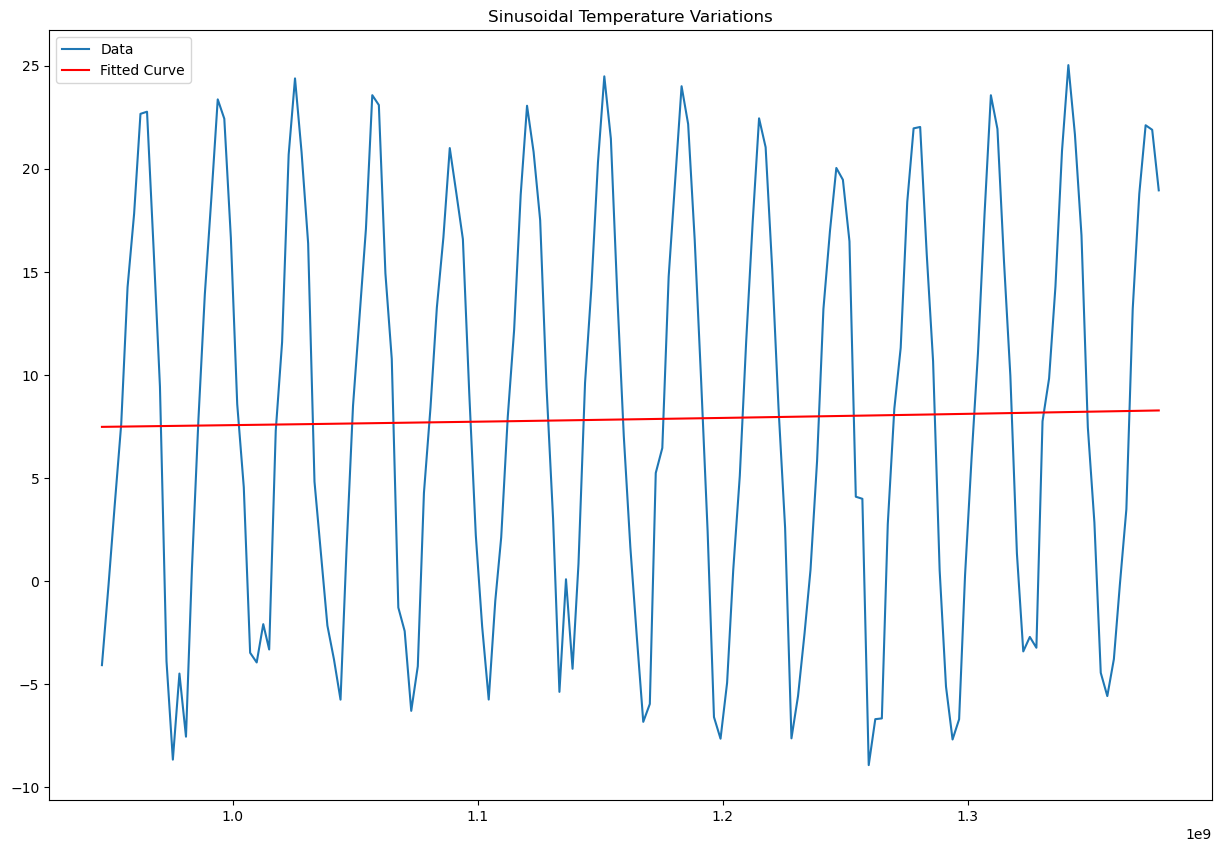

In [260]:
# (1g) Do the following:
# • 1. Replot the data.
# • Plot the line outputted by curve fitter on the same graph as the data.
# • Make sure they mostly match up!

# Using optimized parameters
y_pred = model_equation(x_data, *popt)  # *popt unpacks the parameters from the array

# Create the plot
import matplotlib.pyplot as plt
plt.figure(figsize =(15,10))
plt.title("Sinusoidal Temperature Variations")
plt.plot(x_data, y_data, label='Data')  # Original data
plt.plot(x_data, y_pred, 'r-', label='Fitted Curve')  # Fitted curve using optimized parameters
plt.legend()
plt.show()

# This is not what the plot is supposed to look like, I would expect it to look like a sine curve (the data and the fitted curve)
# I traced back my work to see if I used the wrong variable but I can't find my error 

In [261]:
# (1h) Do they match? If so, you made it!:
# • 1. Use the covariance matrix to calculate the errors for each parameter.
# Recall that the errors are located down the diagonal of the matrix.

# • E.g: Parameter 1’s error is the square root of location [0,0] in the matrix,
# 2’s error is at location [1,1], etc.

errors = np.sqrt(np.diag(pcov))

# Print errors
print("Errors for each parameter:", errors) 

Errors for each parameter: [inf inf inf inf]


In [262]:
# (1i) The final step! Print out your results!
# • 1. Print out each parameter AND its corresponding error with format:
# parameter +/- error.
# • Print out the final equation!

# Print each parameter AND its corresponding error 
print(f"a = {popt[0]:.4f} +/- {errors[0]:.4f}")
print(f"b = {popt[1]:.4f} +/- {errors[1]:.4f}")
print(f"c = {popt[2]:.4f} +/- {errors[2]:.4f}")
print(f"d = {popt[3]:.4f} +/- {errors[3]:.4f}")

# Print out the final equation
print(f"Final equation: y = {popt[0]:.4f} * cos(2π * (x - {popt[3]:.4f}) / {popt[2]:.4f}) + {popt[1]:.4f}")

a = -15.7385 +/- inf
b = 22.4991 +/- inf
c = 2.0000 +/- inf
d = 0.0000 +/- inf
Final equation: y = -15.7385 * cos(2π * (x - 0.0000) / 2.0000) + 22.4991


In [263]:
# 2 Random Plotting Practice

# This problem focuses on generating and visualizing random data in two differ-
# ent types of plots. First, you will create three lists of random numbers, each
# containing 50 elements, with values ranging from 0 to 200. Then, you’ll create
# two instead of vertical subplots:

import random

list1 = [random.randint(0, 200) for _ in range(50)]
list2 = [random.randint(0, 200) for _ in range(50)]
list3 = [random.randint(0, 200) for _ in range(50)]

print("List 1:", list1)
print('')
print("List 2:", list2)
print('')
print("List 3:", list3)

List 1: [93, 145, 39, 87, 113, 120, 196, 152, 20, 5, 119, 80, 160, 14, 58, 47, 114, 156, 39, 13, 75, 51, 165, 191, 105, 26, 77, 171, 141, 132, 123, 119, 133, 183, 56, 199, 127, 49, 69, 145, 49, 151, 117, 65, 177, 87, 100, 191, 55, 138]

List 2: [90, 176, 61, 193, 173, 146, 30, 88, 94, 77, 155, 34, 162, 184, 49, 192, 27, 64, 176, 90, 179, 144, 70, 130, 143, 81, 23, 113, 61, 68, 142, 67, 190, 27, 23, 163, 11, 27, 184, 50, 56, 28, 82, 16, 42, 131, 71, 159, 129, 48]

List 3: [47, 93, 199, 62, 27, 66, 138, 197, 26, 104, 69, 107, 34, 124, 88, 27, 127, 131, 184, 24, 53, 35, 186, 41, 198, 107, 91, 77, 30, 94, 131, 90, 172, 21, 71, 66, 19, 33, 62, 2, 190, 192, 20, 80, 23, 157, 163, 13, 167, 141]


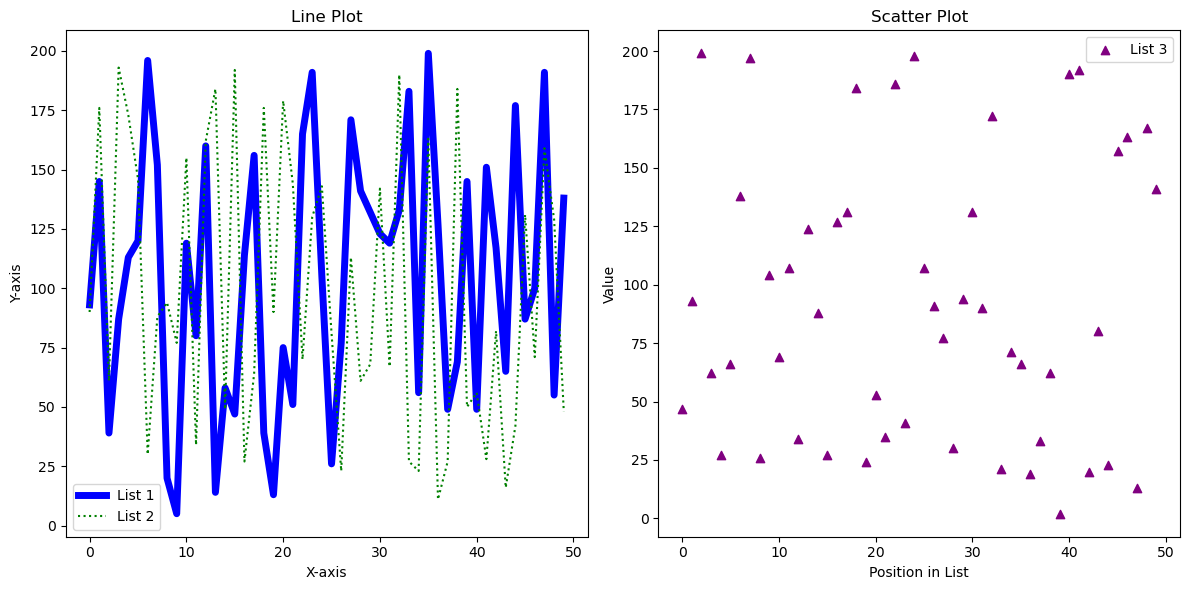

In [267]:
# • 1. The left plot should display the first list of random data as a blue line
# with a line width of 5, and the second list in green with a dotted line style.

# • 2. The right plot should be a scatter plot of the third list, using purple
# triangles as markers. The x-coordinate should correspond to the position
# of each element in the list.

# Make sure to add appropriate titles and legends to each subplot.

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6)) 

# Left plot (line plot)
ax1.plot(list1, color='blue', linewidth=5, label='List 1')  
ax1.plot(list2, color='green', linestyle="dotted", label='List 2')  
ax1.set_xlabel('X-axis')
ax1.set_ylabel('Y-axis')
ax1.set_title('Line Plot')
ax1.legend()

# Right plot (scatter plot)
x_coords = range(len(list3))  
ax2.scatter(x_coords, list3, marker='^', color='purple', label='List 3')
ax2.set_xlabel('Position in List')
ax2.set_ylabel('Value')
ax2.set_title('Scatter Plot')
ax2.legend()

plt.tight_layout()  
plt.show()

In [270]:
# 3 Monte Carlo

# Did you know that you can estimate the value of π using random numbers? Crazy statement but really cool.
# First, you need to generate a large number of random points inside a 1x1 square with one corner at the origin (essentially you are making a unit circle).

# Second, check how many of these points fall within a distance of 1 from the origin (in other words, a radius = 1). 
# These points will lie inside a quarter circle, centered at the origin.

# By using the ratio of points inside the quarter circle to the total number of points, we can estimate π! based on the relationship between the area of a
# quarter circle and the square.

# Your task: - Calculate an estimate of π using this method of N = 10, 10^3, 10^5, 10^6.

def estimate_pi(N):

    inside_circle = 0
    for i in range(N):
        x = random.random()  # random x-coordinate between 0 and 1
        y = random.random()  # random y-coordinate between 0 and 1
        distance = np.sqrt(x**2 + y**2)  # norm/distance from origin
        if distance <= 1:
            inside_circle += 1
    pi_estimate = 4 * (inside_circle / N)  
    return pi_estimate

N_values = [10, 10**3, 10**5, 10**6]
for N in N_values:
    pi_est = estimate_pi(N)
    print(f"For N = {N}, estimated π = {pi_est}")

For N = 10, estimated π = 3.2
For N = 1000, estimated π = 3.108
For N = 100000, estimated π = 3.14848
For N = 1000000, estimated π = 3.142792


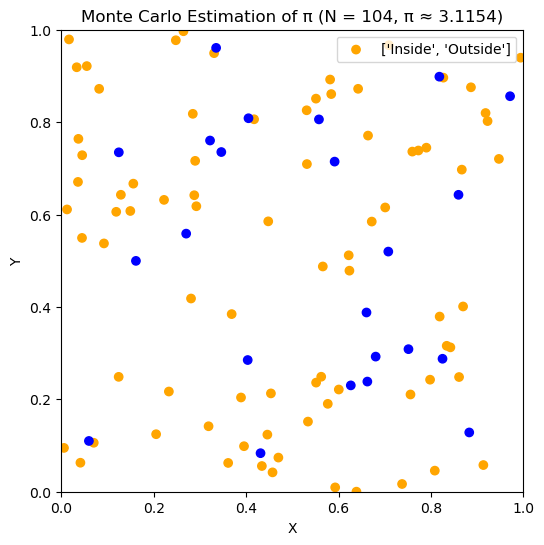

What do you notice as N gets bigger?: As N gets bigger, the value gets closer and closer to the value of 3.141592653589793, 
which implies estimates converge to the value of pi as N increases


In [295]:
# Print these results for each value of N . What do you notice as N gets bigger?
# - For N = 104, plot the points within the quarter circle in one color and the
# points outside in another color. Make sure the entire plots is a square. Display
# the estimate value of π on the plot. Don’t forget to include a title and legend.

def estimate_pi(N):
    inside = 0
    x, y = [], []  # store all points here
    for _ in range(N):
        x_i, y_i = random.random(), random.random()
        x.append(x_i)
        y.append(y_i)
        if x_i**2 + y_i**2 <= 1:
            inside += 1
    pi_est = 4 * (inside / N)
    return pi_est, x, y, inside

# Estimate and plot for N = 104
N = 104
pi_est, x, y, inside = estimate_pi(N)

plt.figure(figsize=(12, 6))
plt.scatter(x, y, c=['orange' if i < inside else 'blue' for i in range(N)], label=['Inside', 'Outside'])
plt.title(f"Monte Carlo Estimation of π (N = {N}, π ≈ {pi_est:.4f})")
plt.xlabel("X")
plt.ylabel("Y")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.gca().set_aspect('equal')
plt.legend()
plt.show()

print(f"What do you notice as N gets bigger?: As N gets bigger, the value gets closer and closer to the value of {np.pi}, \nwhich implies estimates converge to the value of pi as N increases")
